In [7]:
import joblib
import os
import pathlib
import numpy as np
from wifisidechannels.units.txbf import TxBf

PHY_DOMAIN      = 6
CWD = os.getcwd()
DSD = pathlib.Path(os.path.join(CWD, "EXPERIMENT_STATIC", f"ROOM_{PHY_DOMAIN}_STATIC"))
DSD = "/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6"
UNIT = TxBf()
files       = sorted([ pathlib.Path(os.path.join(folder, x)) for folder,_,y in os.walk(DSD) for x in y if ".dump" in x and "meta" not in str(x).lower()])
raw = []
for x in files:
    raw.append((x, joblib.load(x)))

In [ ]:
samples = []
for x in raw:
    samples.append((x[0], np.squeeze(np.array([p.DATA["V"] for p in x[1]]))[5555,:,0, 0]))

In [2]:
for x in samples:
    print(x[0], x[1].shape)

/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/0/24_09_23-19_21_12_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/1/24_09_23-19_37_59_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/10/24_09_23-22_09_08_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/11/24_09_23-22_25_56_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/12/24_09_23-22_42_44_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/13/24_09_23-22_59_30_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/14/24_09_23-23_16_14_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/15/24_09_23-23_33_01_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/16/24_09_23-23_49_49_EMSEC_0123456789_data.dump (234,)
/mnt/fast_work/wifisidechannels/EXPERIMENT/ROOM_6/17/24_0

In [3]:
dist = np.array([ np.linalg.norm(np.abs(samples[0][1]) - np.abs(y[1])) for y in samples[1:] ])

In [4]:
print(dist.shape)
print(dist[-10:])

(43,)
[4.34744217 4.70484886 4.06339421 3.48828005 4.35748051 3.30067208
 3.20952284 4.05001712 3.52978222 3.89713437]


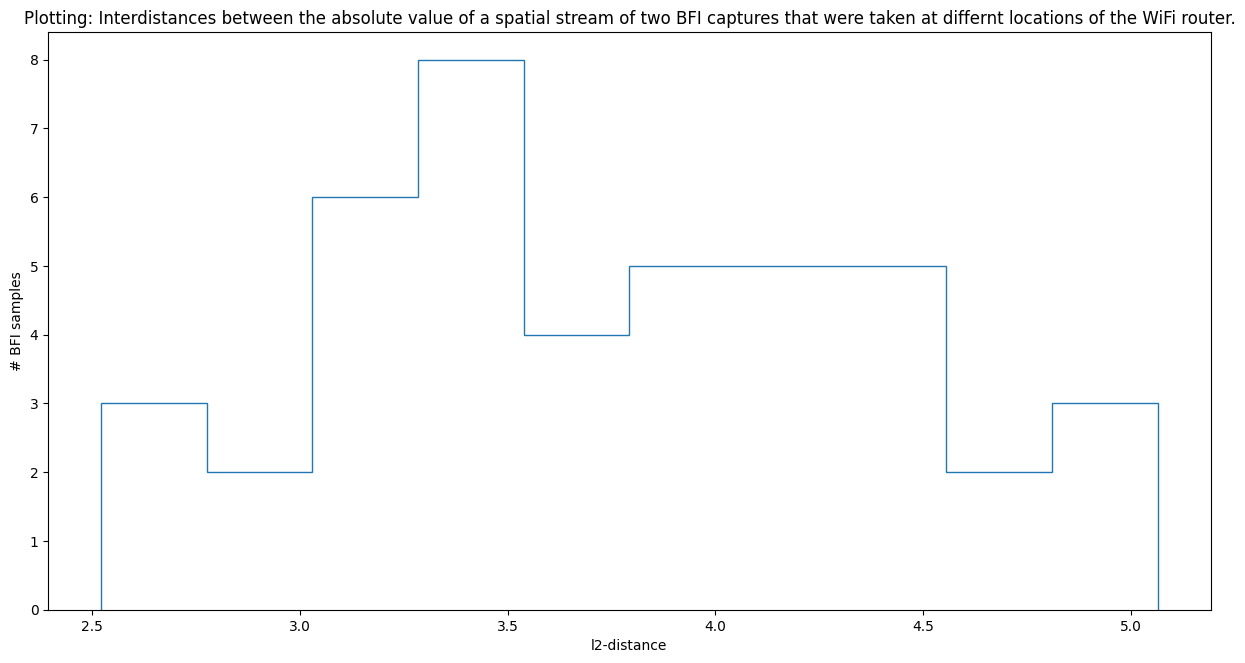

In [5]:
import matplotlib.pyplot as plt
size = (15, 7.5)
xlabel  = "l2-distance"
ylabel  = "# BFI samples"
msg     = "Interdistances between the absolute value of a spatial stream of two BFI captures that were taken at differnt locations of the WiFi router."
plt.rcParams["figure.figsize"] = size
plt.title(f"Plotting: {msg}")
plt.xlabel(xlabel=xlabel)
plt.ylabel(ylabel=ylabel)
counts, bins = np.histogram(dist)
plt.stairs(counts, bins,)

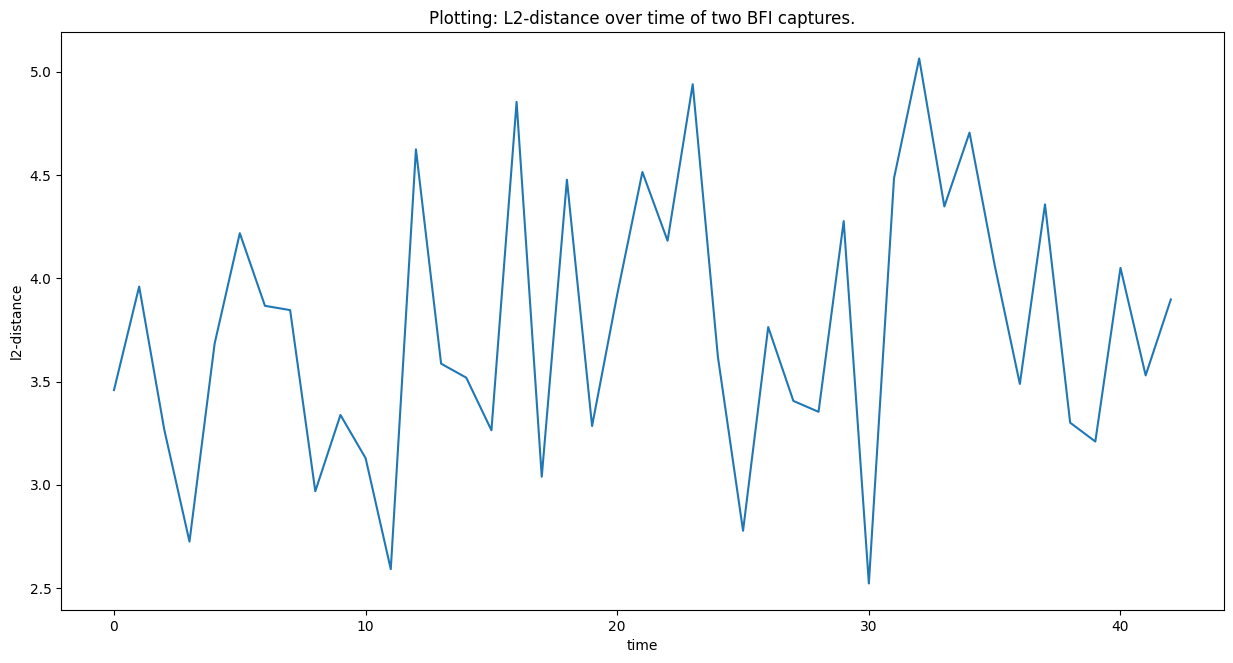

array([3.45870903, 3.95971823, 3.2660029 , 2.72519907, 3.68395191,
       4.21801192, 3.86639045, 3.84571409, 2.96873438, 3.33807844,
       3.12883088, 2.59170804, 4.62397024, 3.58647565, 3.51856551,
       3.26389929, 4.85338913, 3.0391023 , 4.47689676, 3.28460149,
       3.92183845, 4.51406734, 4.18152399, 4.93914058, 3.61993951,
       2.77755842, 3.76366855, 3.40598434, 3.3533697 , 4.27661351,
       2.5223992 , 4.48416595, 5.06375695, 4.34744217, 4.70484886,
       4.06339421, 3.48828005, 4.35748051, 3.30067208, 3.20952284,
       4.05001712, 3.52978222, 3.89713437])

In [6]:
import wifisidechannels.components.plotter as plotter

plot = plotter.Plotter()

plot.plot_data(
    data=list(dist),
    plot=True,
    size=(15,7.5),
    scatter=False,
    msg="L2-distance between one spatial stream of a single sample at a WiFi AP position and a sample with the same index captured at a different WiFi AP position.",
    ylabel="l2-distance",
    xlabel="WiFi AP position index",
)
